In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

In [2]:
class Particle:
    def __init__(self, position):
        # Set up initial position, velocity, and best position
        self.pos = position
        self.v = [0,0]
        self.best_pos = self.pos.copy()
        
    def update(self, pso):
        # Update the velocity in each dimension
        for i in range(2):
            self.v[i] = pso.inertia*self.v[i]+pso.phi_1*(self.best_pos[i]-self.pos[i])*np.random.random()+pso.phi_2*(pso.global_best[i]-self.pos[i])*np.random.random()
 
        # Check for maximum velocity
        if (self.v[0]**2+self.v[1]**2 > pso.max_vel**2):
            for i in range(2):
                self.v[i] = (pso.max_vel/np.sqrt(self.v[0]**2+self.v[1]**2))*self.v[i]
            
        # Update the position
        for i in range(2):
            self.pos[i] += self.v[i]
            
        val = pso.Q(self.pos)
        # Check for new best particle position (minimizing!)
        if (val < self.best_val):
            self.best_val = val
            self.best_pos = self.pos.copy()

        # Check for new best global position (minimizing!)
        if (val < pso.global_best_val):
            pso.global_best_val = val
            pso.global_best = self.pos.copy()


In [3]:
class PSO:
    def __init__(self, num_particles, inertia, phi_1, phi_2, ww, wh, max_vel):
        # Set up all the parameters
        self.num_particles = num_particles
        self.inertia = inertia
        self.phi_1 = phi_1
        self.phi_2 = phi_2
        self.max_vel = max_vel
        self.global_best = [0,0]
        self.global_best_val = None
        self.particles = []
        
        # Create all the particles and initialize local best and 
        for i in range(self.num_particles):
            p = []
            p.append(np.random.random()*ww-ww/2.0)
            p.append(np.random.random()*wh-wh/2.0)
            particle = Particle(p)
            self.particles.append(particle)
            particle.best_val = self.Q(p)
            # global best information
            if (self.global_best_val == None or particle.best_val < self.global_best_val):
                self.global_best_val = particle.best_val
                self.global_best = particle.pos.copy()
            
    # Define the objective function    
    def Q(self, position):
        x = position[0]
        y = position[1]
        # Rosenbrock (banana) function
        val=(1-x)**2+100*(y-x**2)**2
        return val
    
    # Update across the particles
    def update(self):
        for i in range(self.num_particles):
            p = self.particles[i]
            p.update(self)
            
    # Return all the positions for printing as x and y arrays
    def get_all_positions(self):
        x = []
        y = []
        for i in range(self.num_particles):
            x.append(self.particles[i].pos[0])
            y.append(self.particles[i].pos[1])
        return x, y

In [21]:
pso = PSO(100, 0.9, 0.5, 2, 100, 100, 10)

<IPython.core.display.Javascript object>


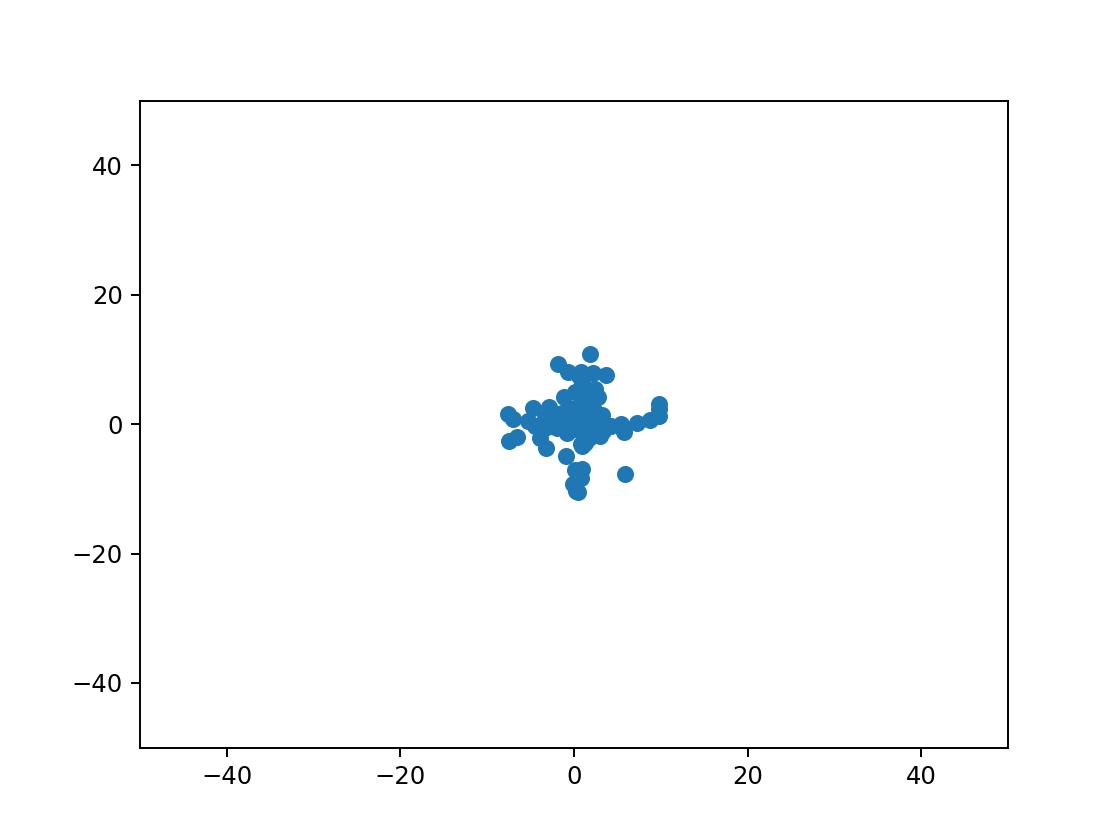

In [22]:
def update(i):
    pso.update()
    x,y = pso.get_all_positions()
    scat.set_offsets(np.c_[x, y])
    return scat,
    
fig, ax = plt.subplots()
ax.set(xlim=(-50, 50), ylim=(-50, 50))
x,y = pso.get_all_positions()
scat = ax.scatter(x,y)

anim = animation.FuncAnimation(fig, update, interval=20, frames=100, repeat=False)
plt.show()


In [23]:
print(pso.global_best)

[0.9505361403527377, 0.9067870967871388]


In [24]:
print(pso.global_best_val)

0.0035147490626517303
